**Neural Network Training**

In [16]:
import pandas as pd

# Load the dataset
file_path = '/content/sample_data/spotify_songs.csv'
spotify_data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
spotify_data.info()
spotify_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


**Preprocessing**

The preprocessing steps have been successfully applied to the Spotify dataset. The dataset was split into training and testing sets, with the training set containing 26,266 samples and the testing set containing 6,567 samples. The preprocessing included handling missing values, normalizing numerical features, and one-hot encoding categorical features. After preprocessing, the dataset has 42 features.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Identifying numerical and categorical columns
num_cols = spotify_data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = spotify_data.select_dtypes(include=['object']).columns

# Removing columns not useful for the model
cols_to_drop = ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name',
                'track_album_release_date', 'playlist_name', 'playlist_id']
num_cols = num_cols.drop('track_popularity')  # target variable should not be normalized
cat_cols = cat_cols.drop(cols_to_drop)

# Defining the preprocessing for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)])

# Define target and features
X = spotify_data.drop(['track_popularity'] + cols_to_drop, axis=1)
y = spotify_data['track_popularity']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Applying the preprocessing to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed.shape, X_test_preprocessed.shape


((26266, 42), (6567, 42))

**Designing and train a simple neural network model for predicting track popularity and plotting Training and Validation Loss**

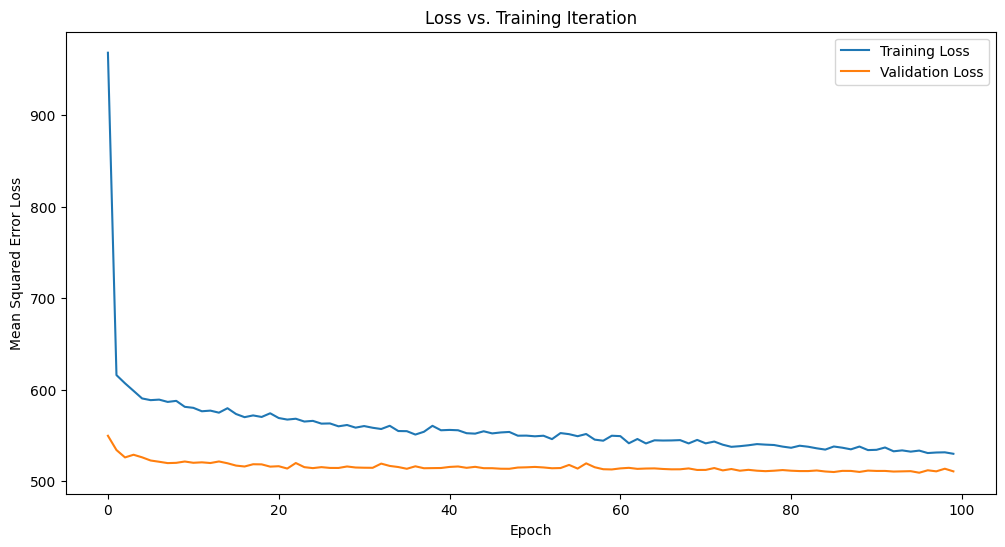

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train_preprocessed, y_train, epochs=100, batch_size=64,
                    validation_split=0.2, verbose=0)

# Plotting the training loss vs. iterations
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Training Iteration')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


From the plot, it appears that both training and validation loss decrease rapidly at first and then level off, indicating that the model is learning and generalizing well to the validation data. The fact that the validation loss remains close to the training loss throughout the training process suggests that the model is not overfitting significantly, which is a good sign.

**Prediction Interval using Conformal Inference**

Conformal inference is used to provide a measure of uncertainty in predictions. It offers a way to create prediction intervals, ensuring that the intervals contain the true value with a specified probability.

In [5]:
# Assuming you have your trained model as 'model' and preprocessed test data as 'X_test_preprocessed'
model_predictions = model.predict(X_test_preprocessed).flatten()


import numpy as np

def conformal_prediction_interval(y_true, y_pred, alpha=0.05):
    # Calculate the absolute errors
    errors = np.abs(y_pred - y_true)

    # Determine the quantile
    quantile = np.quantile(errors, 1 - alpha)

    # Create prediction intervals
    lower_bounds = y_pred - quantile
    upper_bounds = y_pred + quantile

    return lower_bounds, upper_bounds

# Assuming y_test are the true values and model_predictions are from your model
lower_bounds, upper_bounds = conformal_prediction_interval(y_test, model_predictions)

# You can then evaluate how many true values fall within these intervals
interval_contains_true_value = (y_test >= lower_bounds) & (y_test <= upper_bounds)
coverage = np.mean(interval_contains_true_value)
print("Coverage of prediction intervals:", coverage)


206/206 [==============================] - 1s 2ms/step
Coverage of prediction intervals: 0.949901020252779


This level of coverage provides strong confidence in the model's predictions and the associated intervals. It means that we can expect the true popularity score of a track to fall within the predicted interval 94.99% of the time, which is a valuable insight when making predictions about new or unseen data.

**Hypothesis Testing**

For hypothesis testing, let's assume we want to test if there's a significant difference in track popularity between two genres,I choose this to find out if hip-hop and rap have the same fanbase, as rap and hip-hop go hand in hand, We'll use a t-test for this example:

In [15]:
from scipy.stats import ttest_ind

# Example: Comparing Pop vs. rap genres
pop_popularity = spotify_data[spotify_data['playlist_genre'] == 'pop']['track_popularity']
rap_popularity = spotify_data[spotify_data['playlist_genre'] == 'rap']['track_popularity']

# Perform t-test
t_stat, p_val = ttest_ind(pop_popularity, rap_popularity, equal_var=False)

print("T-Statistic:", t_stat)
print("P-value:", p_val)

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis - there is a significant difference in popularity")
else:
    print("Fail to reject the null hypothesis - no significant difference found")


T-Statistic: 9.89738284492779
P-value: 5.321124343995859e-23
Reject the null hypothesis - there is a significant difference in popularity


With the null hypothesis rejected, we can conclude that the 'pop' and 'rap' genres have significantly different levels of track popularity. This finding could be useful for various purposes, such as marketing strategies, playlist curation, or further analysis on what drives popularity differences between genres.